# CMB Comparison: EDE vs $\Lambda$CDM

In this notebook we show the changes made to the CMB in the early dark energy scenario compared to the standard concordance model. This notebook also shows exactly how all the plots in Hill et al. related to the CMB were made.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
from scipy.integrate import odeint
import math

matplotlib.rcParams['axes.linewidth'] = 10
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['axes.labelsize'] = 75
matplotlib.rcParams['xtick.labelsize'] = 65 
matplotlib.rcParams['ytick.labelsize'] = 65
matplotlib.rcParams['legend.fontsize'] = 65

Setting to best fit $\Lambda$CDM values for Planck.

In [2]:
LCDM_settings = {  'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
                   'h':0.6821,
                   'omega_b':0.02253,
                   'omega_cdm':0.1177,
                   'A_s':2.216e-9, 
                   'n_s':0.9686,
                   'tau_reio':0.085,
                   'm_ncdm': 0.06,
                   'N_ncdm':1, 
                   'N_ur':2.0328,
                   'l_max_scalars':3508,
                   'non linear':'HMcode',
                   'P_k_max_h/Mpc':100,
                   'z_max_pk':2.}

In [3]:
LCDM = Class()
LCDM.set(LCDM_settings)
LCDM.compute()

Now the same but for best fit EDE parameters.

In [4]:
EDE = Class()

EDE.set({'h': .7219,
         'fEDE': 0.122,
         'log10z_c': 3.562,
         'thetai_scf': 2.83,
         'A_s': 2.215e-09,
         'n_s': 0.9889,
         'omega_b': 0.02253,
         'omega_cdm': 0.1306,
         'tau_reio': 0.072,
         'non linear':'HMCODE',
         'N_ncdm':1,
         'm_ncdm': 0.06,
         'N_ur':2.0328, 
         'Omega_Lambda':0.0, 
         'Omega_fld':0, 
         'Omega_scf':-1, 
         'n_scf':3, 
         'CC_scf':1, 
         'scf_parameters':'1, 1, 1, 1, 1, 0.0', 
         'scf_tuning_index':3, 
         'attractor_ic_scf':'no', 
         'output':'tCl pCl lCl mPk', 
         'lensing':'yes', 
         'l_max_scalars':3508, 
         'P_k_max_h/Mpc':30,
         'z_max_pk':2.})

EDE.compute()

In [5]:
clLCDM=LCDM.lensed_cl()
clEDE=EDE.lensed_cl()
clell = clLCDM.get("ell")
clTTLCDM = clLCDM.get("tt")
clTTEDE = clEDE.get("tt")
clppLCDM = clLCDM.get("pp")
clppEDE = clEDE.get("pp")
clEELCDM = clLCDM.get("ee")
clEEEDE = clEDE.get("ee")
clTELCDM = clLCDM.get("te")
clTEEDE = clEDE.get("te")


DellTTLCDM = 1e12*np.multiply(np.multiply(clell,clell+1),clTTLCDM)/(2*3.14)
DellTTEDE = 1e12*np.multiply(np.multiply(clell,clell+1),clTTEDE)/(2*3.14)
DellppLCDM = 1e12*np.multiply(np.multiply(clell,clell+1),clppLCDM)/(2*3.14)
DellppEDE = 1e12*np.multiply(np.multiply(clell,clell+1),clppEDE)/(2*3.14)
DellTELCDM = 1e12*np.multiply(np.multiply(clell,clell+1),clTELCDM)/(2*3.14)
DellTEEDE = 1e12*np.multiply(np.multiply(clell,clell+1),clTEEDE)/(2*3.14)
DellEELCDM = 1e12*np.multiply(np.multiply(clell,clell+1),clEELCDM)/(2*3.14)
DellEEEDE = 1e12*np.multiply(np.multiply(clell,clell+1),clEEEDE)/(2*3.14)

In [6]:
cellgg = np.zeros(len(clell)-1)
DellggLCDM = np.zeros(len(clell)-1)
DellggEDE= np.zeros(len(clell)-1)

for i in range(2,len(clell)-1):
    cellgg[i]=clell[i]
    prefactor=0.25*1e12*(clell[i]+2)*(clell[i]+1)*clell[i]*(clell[i]-1)
    DellggLCDM[i] = prefactor*clell[i]*(clell[i]+1)*clppLCDM[i]/(2*3.14)
    DellggEDE[i] = prefactor*clell[i]*(clell[i]+1)*clppEDE[i]/(2*3.14)

Below we reproduce the plots for $D_\ell^{TT}$, $D_\ell^{TE}$, $D_\ell^{EE}$, and $C_L^{\kappa \kappa}$ used in Hill et al.

## Figure 3

CMB temperature anisotropy power spectra (left panel) and residuals (right panel) for $\Lambda $CDM (black, solid) and EDE (red, dashed) models, with $H_0 = 68.21$ km/s/Mpc and $H_0 = 72.19$ km/s/Mpc, respectively.

/home/parallels/anaconda3/envs/class/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


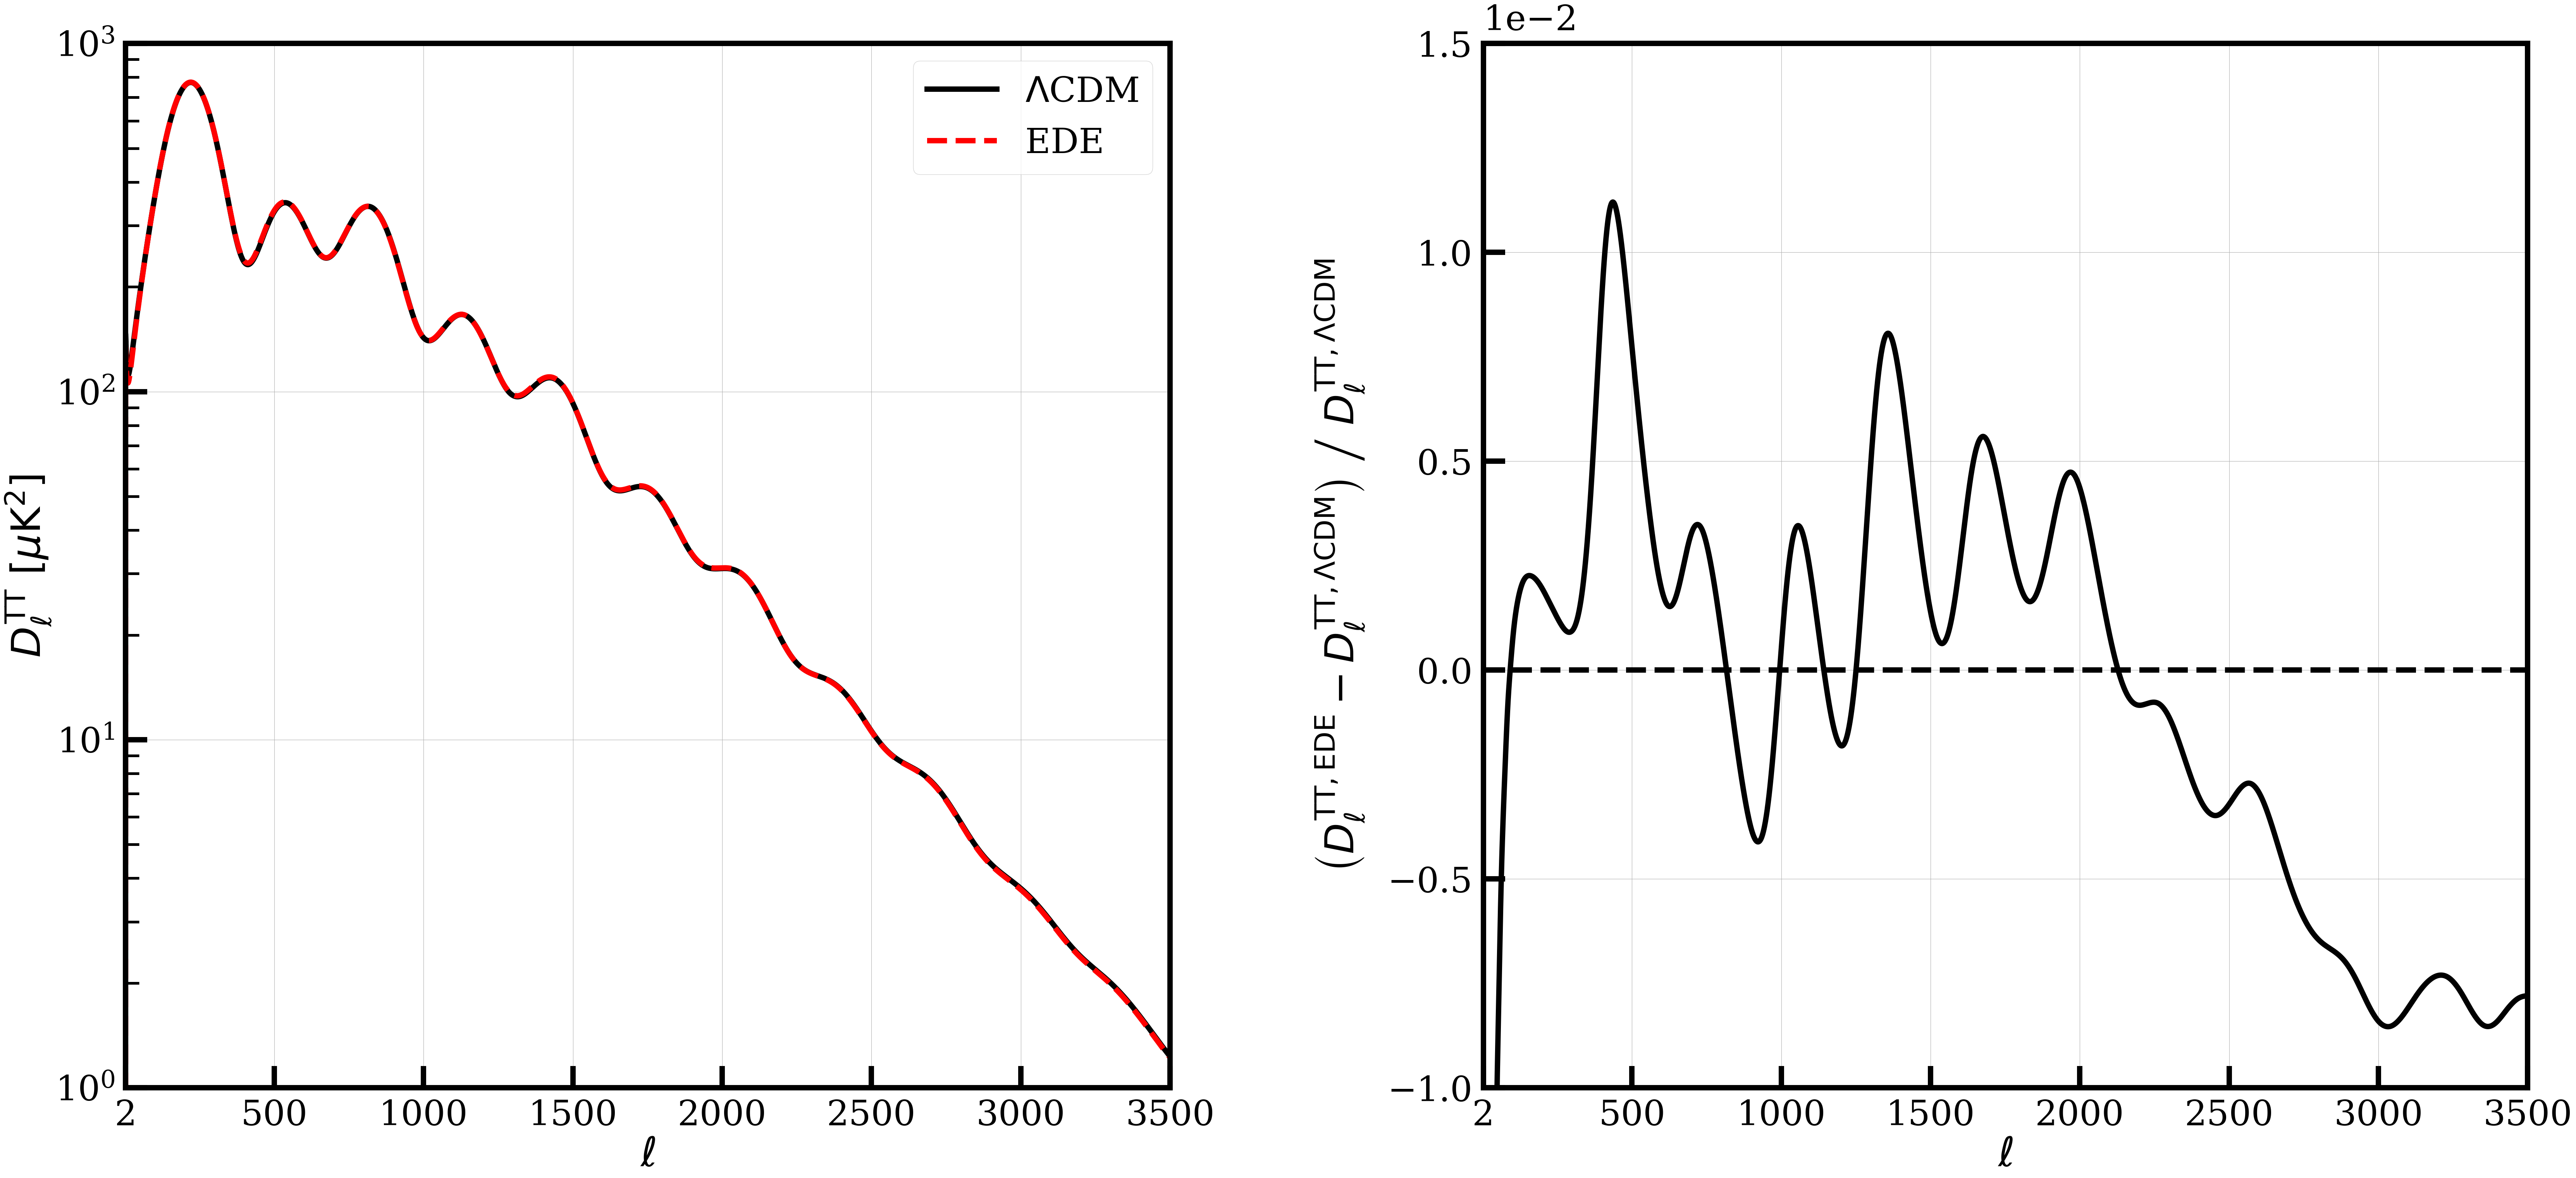

In [7]:
pos = [2,500,1000,1500,2000,2500,3000,3500]

matplotlib.axis.YAxis.OFFSETTEXTPAD = 25

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(80,35))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

ax1.grid()
ax1.plot(clell,DellTTLCDM,c='k',lw=10,label=r'$\Lambda$CDM')
ax1.plot(clell,DellTTEDE,c='r',ls='--',lw=10,label=r'EDE')
ax1.set_yscale('log')
ax1.set_xlim([2,3500])
ax1.set_ylim([1e0,1e3])
ax1.set_xticks(pos)
ax1.set_xticklabels(pos)
ax1.set_xlabel(r'$\ell$')
ax1.set_ylabel(r'$D_\ell ^{\rm TT} ~ [\mu {\rm K}^2 ]$')
ax1.tick_params(pad=20)
ax1.tick_params(which='major',axis='x', length=40, width=10, direction='in')
ax1.tick_params(which='minor',axis='x', length=25, width=5, direction='in')
ax1.tick_params(which='major',axis='y', length=40, width=10, direction='in')
ax1.tick_params(which='minor',axis='y', length=25, width=5, direction='in')
ax1.legend()
ax2.grid()
ax2.set_xlim([2,3500])
ax2.set_ylim([-0.01,0.015])
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.axhline(0,c='k',lw=10,ls='--')
ax2.plot(clell,(DellTTEDE - DellTTLCDM)/DellTTLCDM,c='k',lw=10.)
ax2.set_xticks(pos)
ax2.set_xticklabels(pos)
ax2.set_xlabel(r'$\ell$')
ax2.set_ylabel(r'$ \left(D_\ell ^{\rm TT,EDE} - D_\ell ^{\rm TT,\Lambda CDM} \right) ~ \left/ ~ D_\ell ^{\rm TT,\Lambda CDM} \right.$',labelpad=40)#,fontsize=25)
ax2.tick_params(pad=20)
ax2.tick_params(which='major',axis='x', length=40, width=10, direction='in')
ax2.tick_params(which='minor',axis='x', length=25, width=5, direction='in')
ax2.tick_params(which='major',axis='y', length=40, width=10, direction='in')
ax2.tick_params(which='minor',axis='y', length=25, width=5, direction='in')
plt.savefig('../figures-for-paper/cmb/DellTT.pdf',bbox_inches='tight')

## Figure 20
CMB lensing convergence auto-power spectrum in EDE and $\Lambda$CDM and the fractional difference between them.

/home/parallels/anaconda3/envs/class/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


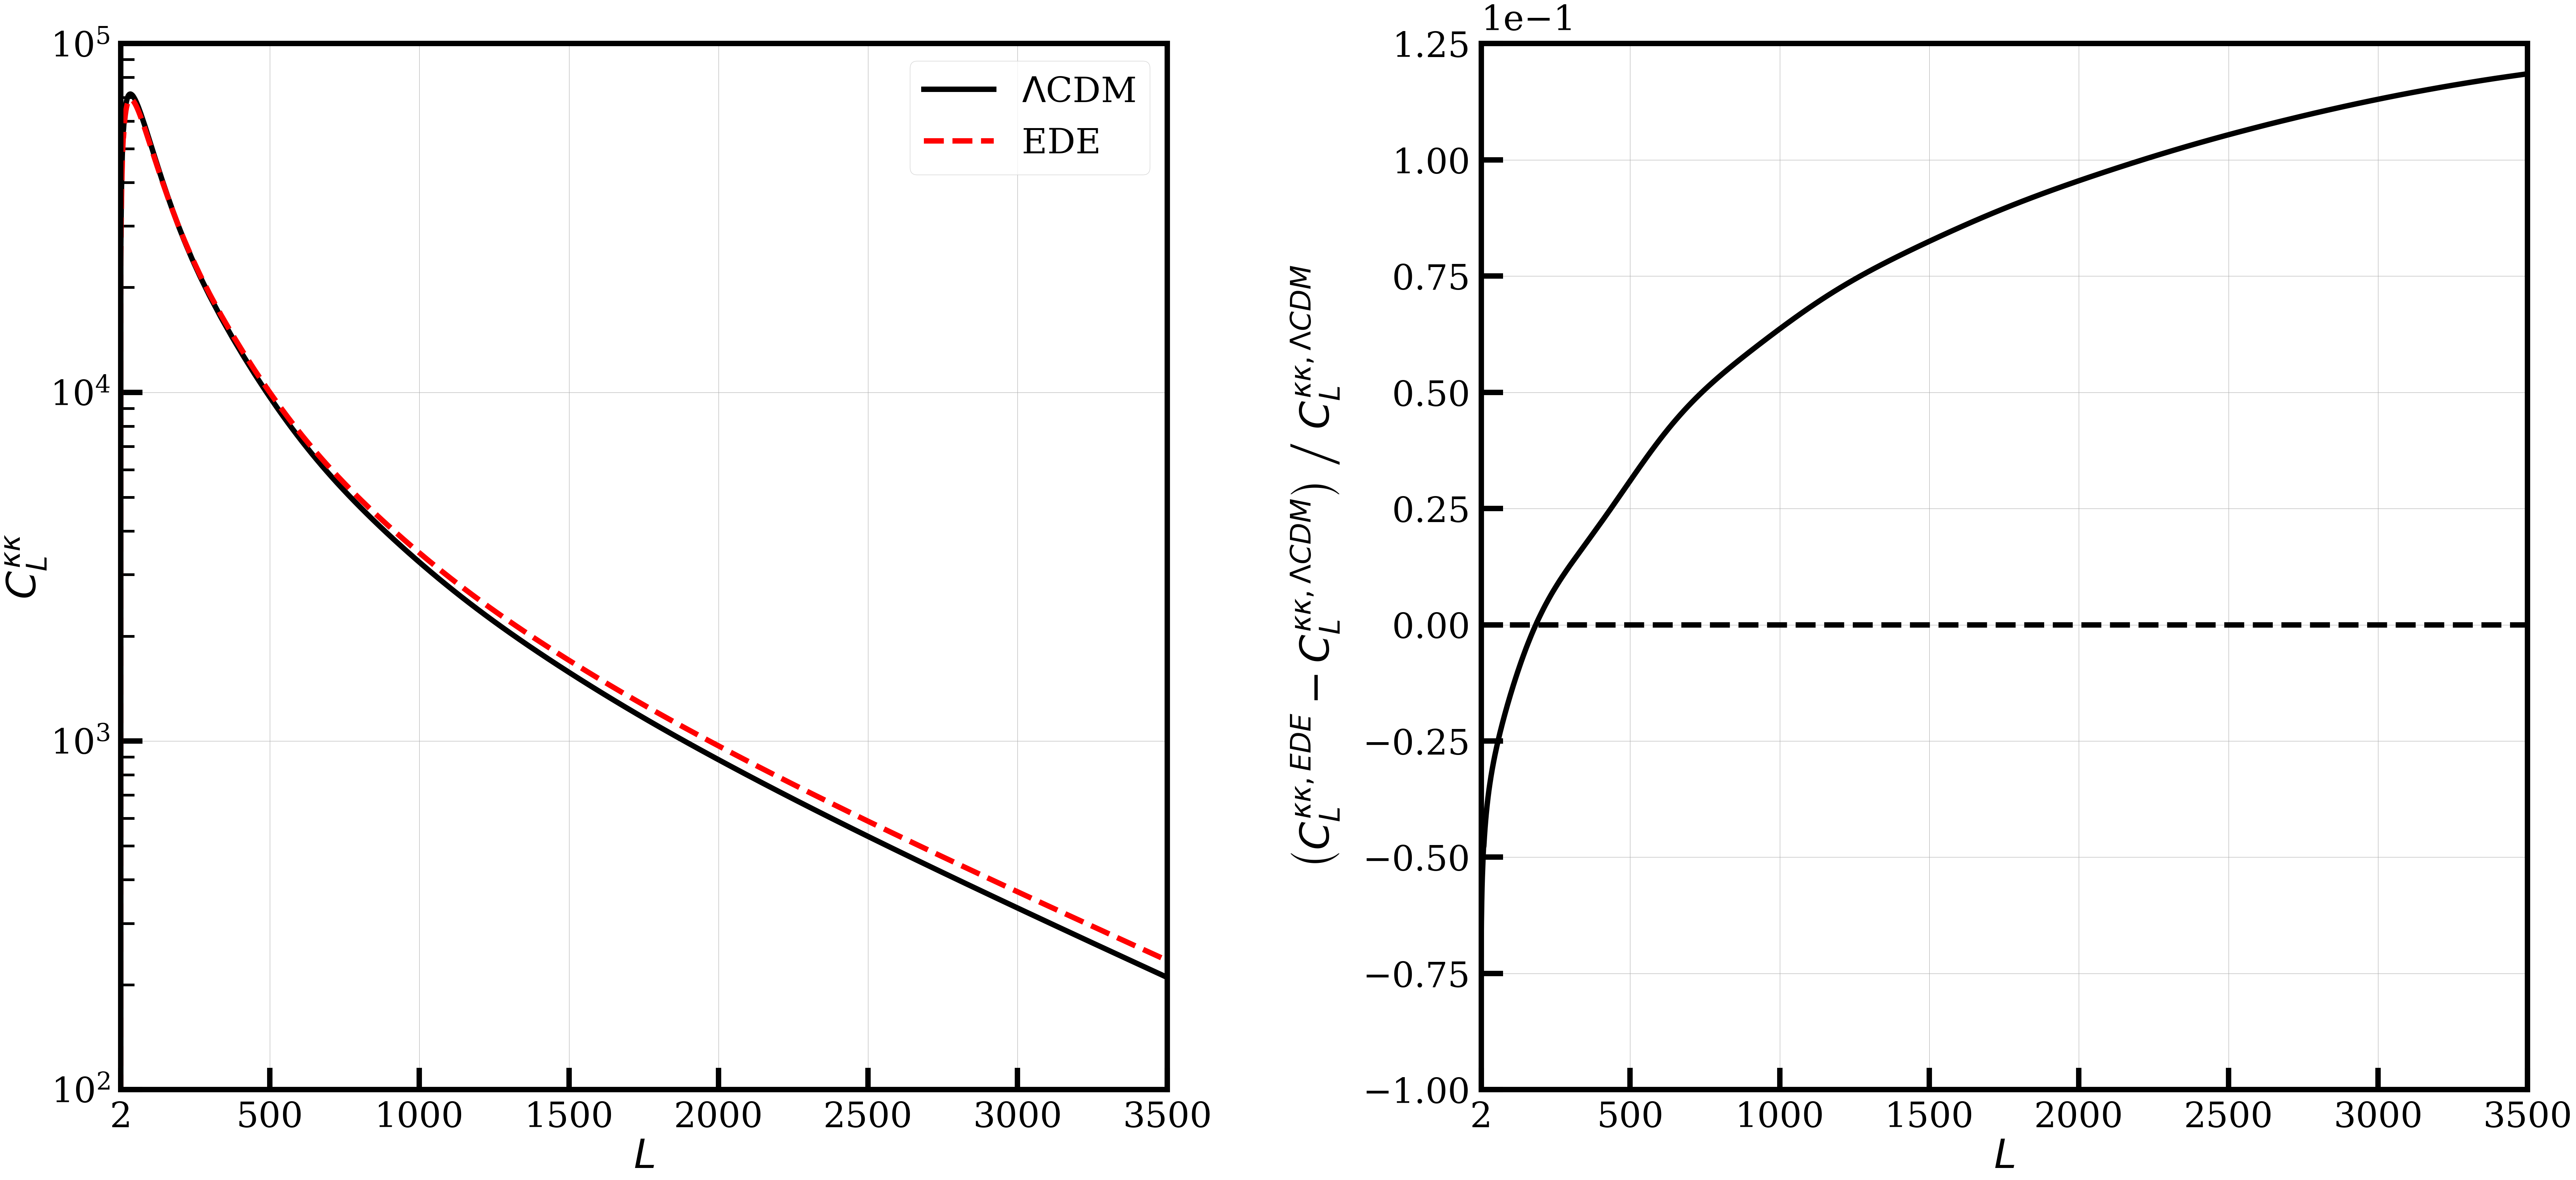

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(80,35))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

ax1.grid()
ax1.plot(clell,np.multiply(clell,clell+1)/(2) * DellppLCDM,c='k',lw=10,label=r'$\Lambda$CDM')
ax1.plot(clell,np.multiply(clell,clell+1)/(2) * DellppEDE,c='r',ls='--',lw=10,label=r'EDE')
ax1.set_yscale('log')
ax1.set_xlim([2,3500])
ax1.set_ylim([1e2,1e5])
ax1.set_xticks(pos)
ax1.set_xticklabels(pos)
ax1.set_xlabel(r'$L$')
ax1.set_ylabel(r'$C_L ^{ \kappa \kappa}$')
ax1.tick_params(pad=20)
ax1.tick_params(which='major',axis='x', length=40, width=10, direction='in')
ax1.tick_params(which='minor',axis='x', length=25, width=5, direction='in')
ax1.tick_params(which='major',axis='y', length=40, width=10, direction='in')
ax1.tick_params(which='minor',axis='y', length=25, width=5, direction='in')
ax1.legend()
ax2.grid()
ax2.set_xlim([2,3500])
ax2.set_ylim([-1e-1,1.25e-1])
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.axhline(0,c='k',lw=10,ls='--')
ax2.plot(clell,(DellppEDE - DellppLCDM)/DellppLCDM,c='k',lw=10.)
ax2.set_xticks(pos)
ax2.set_xticklabels(pos)
ax2.set_xlabel(r'$L$')
ax2.set_ylabel(r'$ \left(C_L ^{ \kappa \kappa,EDE} - C_L ^{ \kappa \kappa,\Lambda CDM} \right) ~ \left/ ~ C_L ^{ \kappa \kappa,\Lambda CDM} \right.$',labelpad=40)
ax2.tick_params(pad=20)
ax2.tick_params(which='major',axis='x', length=40, width=10, direction='in')
ax2.tick_params(which='minor',axis='x', length=25, width=5, direction='in')
ax2.tick_params(which='major',axis='y', length=40, width=10, direction='in')
ax2.tick_params(which='minor',axis='y', length=25, width=5, direction='in')

plt.savefig('../figures-for-paper/cmb/Dellpp.pdf',bbox_inches='tight')

## Figure 21
CMB EE (left) and TE (right) power spectra and fractional difference between EDE and $\Lambda$CDM (bottom). Note that in the fractional difference plot for TE we have normalized by the variance, differing in our convention relative to other figures, because of the zero crossings of the TE cross-correlation.

/home/parallels/anaconda3/envs/class/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
/home/parallels/anaconda3/envs/class/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in true_divide


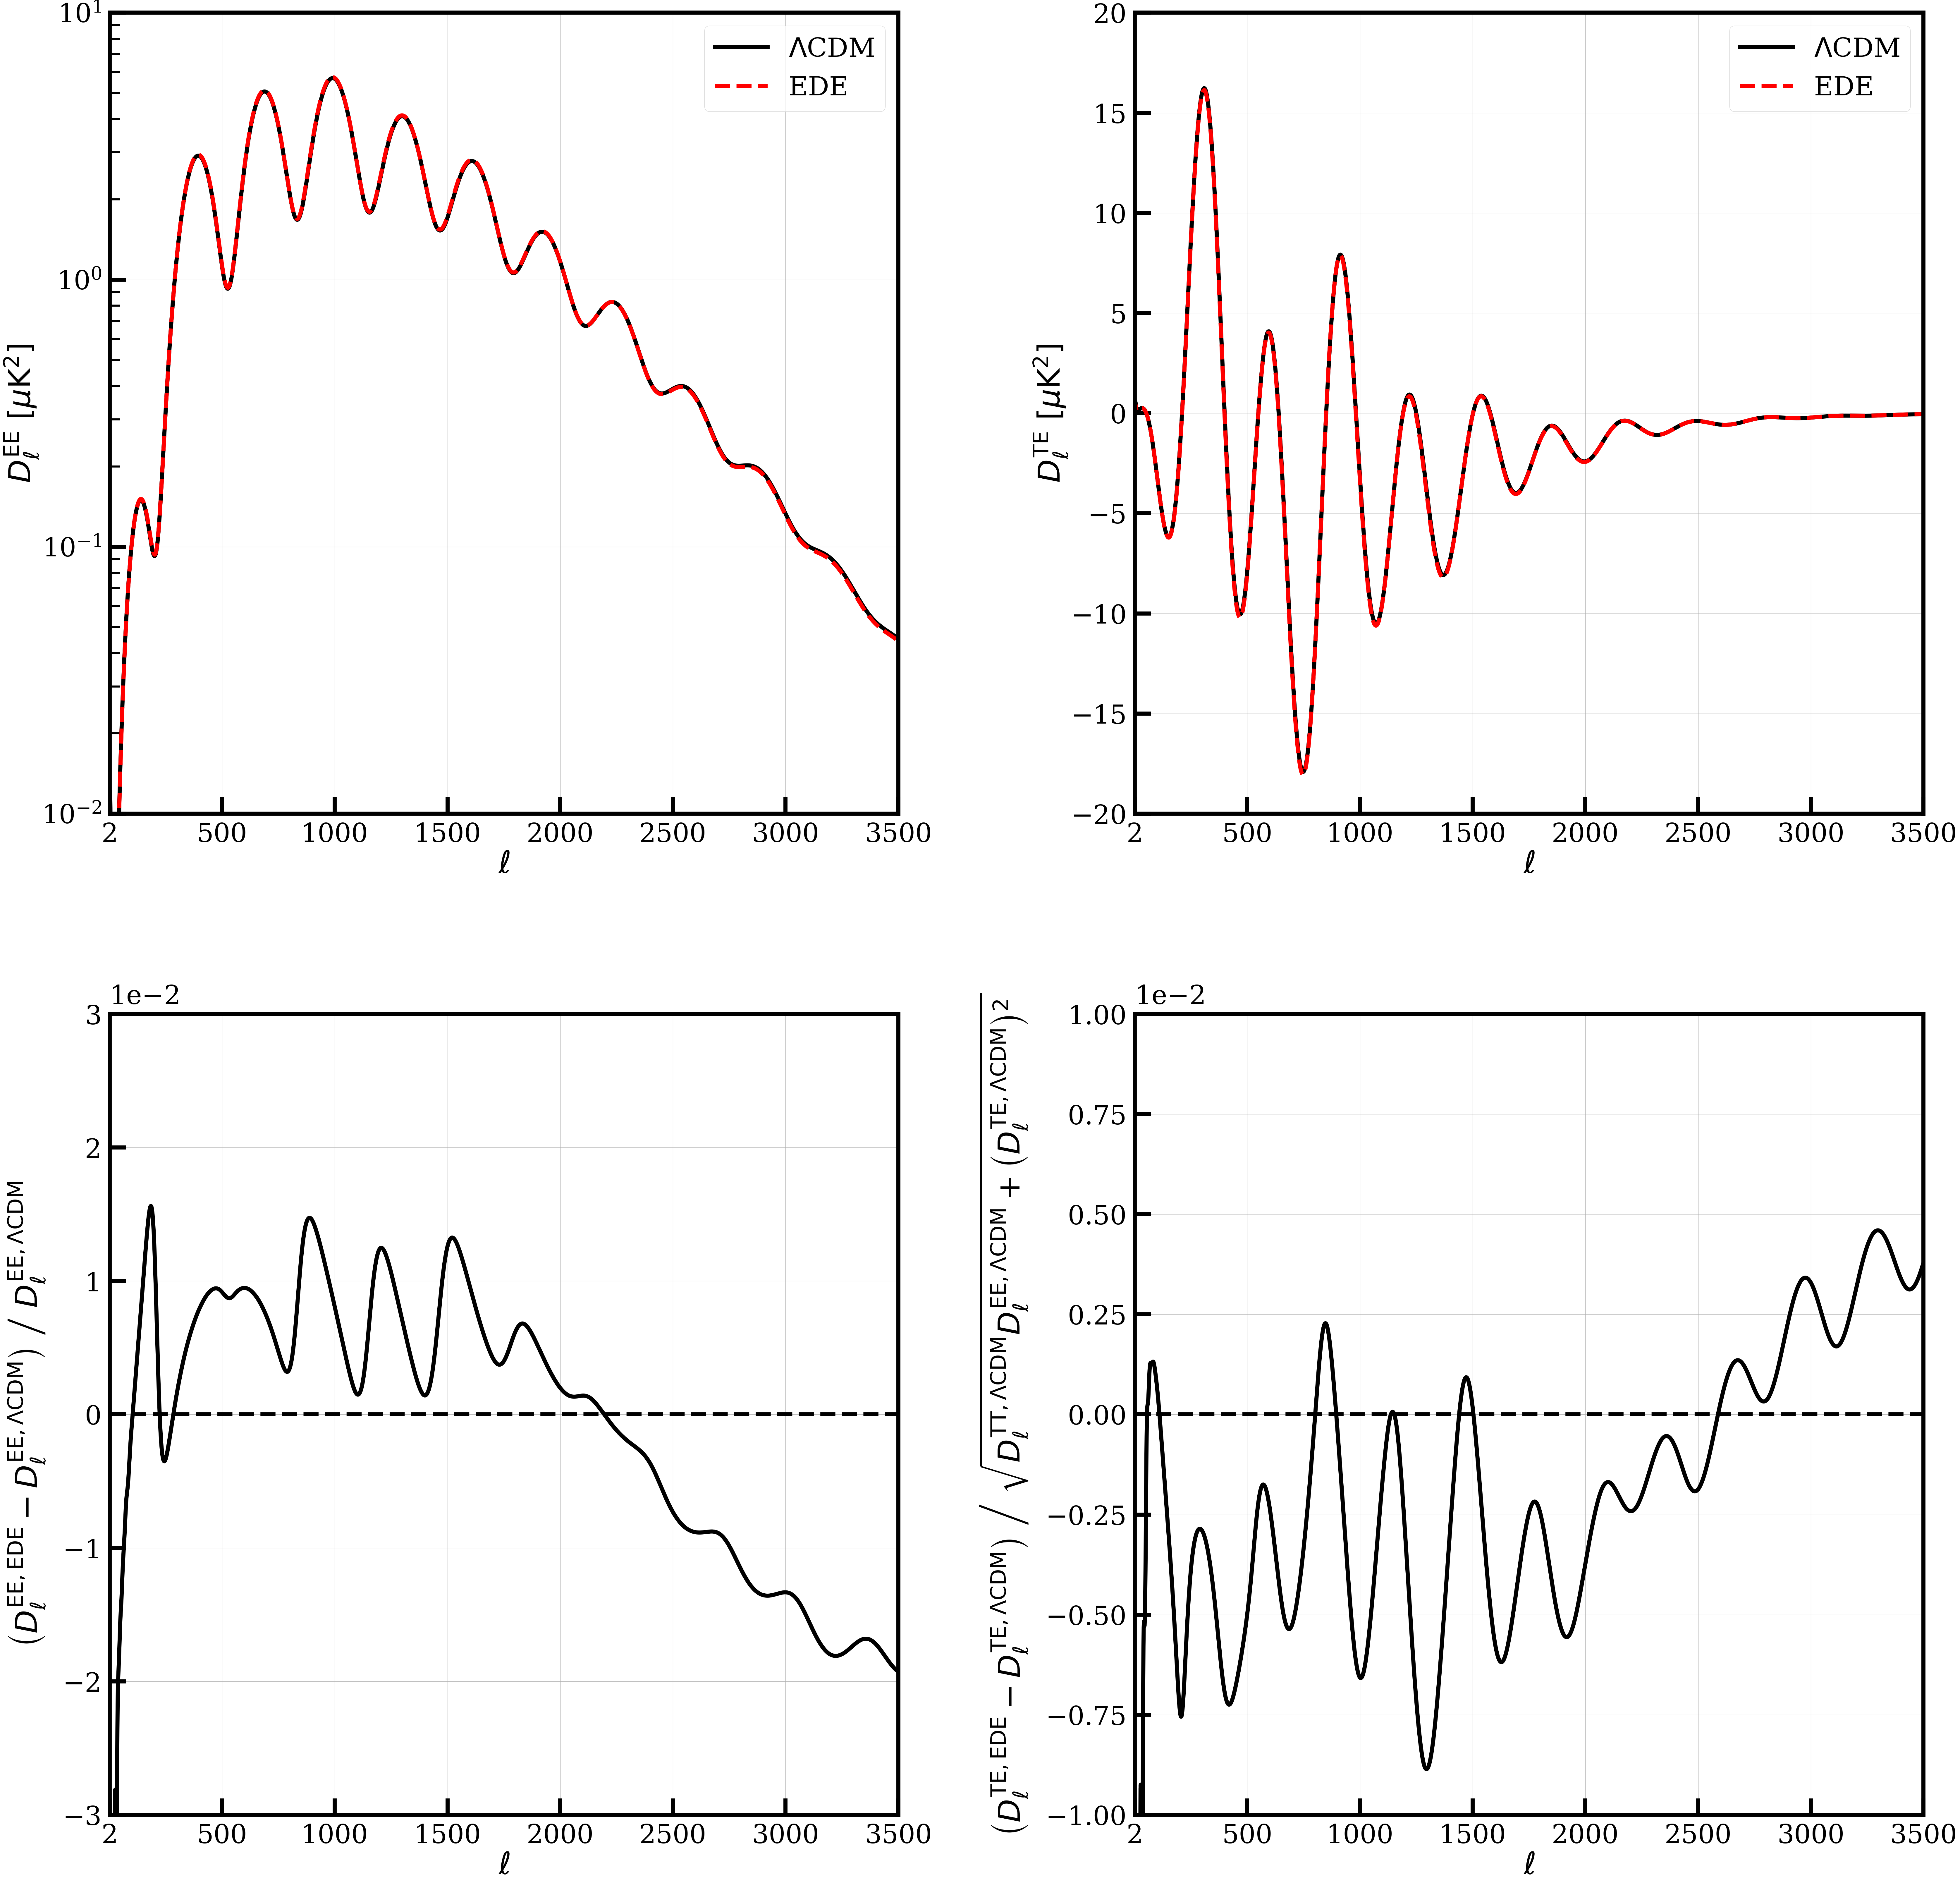

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(80,80))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.25)


#########################################################
#########################################################
####### EE ##############################################
ax1.grid()
ax1.plot(clell,DellEELCDM,c='k',lw=10,label=r'$\Lambda$CDM')
ax1.plot(clell,DellEEEDE,c='r',ls='--',lw=10,label=r'EDE')
ax1.set_yscale('log')
ax1.set_xlim([2,3500])
ax1.set_ylim([1e-2,1e1])
ax1.set_xticks(pos)
ax1.set_xticklabels(pos)
ax1.set_xlabel(r'$\ell$')
ax1.set_ylabel(r'$D_\ell ^{\rm EE} ~ [\mu {\rm K}^2 ]$')
ax1.tick_params(pad=20)
ax1.tick_params(which='major',axis='x', length=40, width=10, direction='in')
ax1.tick_params(which='minor',axis='x', length=25, width=5, direction='in')
ax1.tick_params(which='major',axis='y', length=40, width=10, direction='in')
ax1.tick_params(which='minor',axis='y', length=25, width=5, direction='in')
ax1.legend()

#########################################################
ax3.grid()
ax3.set_xlim([2,3500])
ax3.set_ylim([-0.03,0.03])
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax3.axhline(0,c='k',lw=10,ls='--')
ax3.plot(clell,(DellEEEDE - DellEELCDM)/DellEELCDM,c='k',lw=10.)
ax3.set_xticks(pos)
ax3.set_xticklabels(pos)
ax3.set_xlabel(r'$\ell$')
ax3.set_ylabel(r'$ \left(D_\ell ^{\rm EE,EDE} - D_\ell ^{\rm EE,\Lambda CDM} \right) ~ \left/ ~ D_{\ell} ^{\rm EE,\Lambda CDM}\right.$',labelpad=40)
ax3.tick_params(pad=20)
ax3.tick_params(which='major',axis='x', length=40, width=10, direction='in')
ax3.tick_params(which='minor',axis='x', length=25, width=5, direction='in')
ax3.tick_params(which='major',axis='y', length=40, width=10, direction='in')
ax3.tick_params(which='minor',axis='y', length=25, width=5, direction='in')
##########################################################


##########################################################
##########################################################
####### TE ###############################################
n = len(DellTELCDM)
norm = np.sqrt(DellTTLCDM*DellEELCDM + DellTELCDM**2)
##########################################################

ax2.grid()
ax2.plot(clell,DellTELCDM,c='k',lw=10,label=r'$\Lambda$CDM')
ax2.plot(clell,DellTEEDE,c='r',ls='--',lw=10,label=r'EDE')
ax2.set_xlim([2,3500])
ax2.set_ylim([-20,20])
ax2.set_xticks(pos)
ax2.set_xticklabels(pos)
ax2.set_xlabel(r'$\ell$')
ax2.set_ylabel(r'$D_\ell ^{\rm TE} ~ [\mu {\rm K}^2 ]$')
ax2.tick_params(pad=20)
ax2.tick_params(which='major',axis='x', length=40, width=10, direction='in')
ax2.tick_params(which='minor',axis='x', length=25, width=5, direction='in')
ax2.tick_params(which='major',axis='y', length=40, width=10, direction='in')
ax2.tick_params(which='minor',axis='y', length=25, width=5, direction='in')
ax2.legend()

###########################################################
ax4.grid()
ax4.set_xlim([2,3500])
ax4.set_ylim([-1e-2,1e-2])
ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax4.axhline(0,c='k',lw=10,ls='--')
ax4.plot(clell,(DellTEEDE - DellTELCDM)/norm,c='k',lw=10.)
ax4.set_xticks(pos)
ax4.set_xticklabels(pos)
ax4.set_xlabel(r'$\ell$')
ax4.set_ylabel(r'$ \left(D_\ell ^{\rm TE,EDE} - D_\ell ^{\rm TE,\Lambda CDM} \right) ~ \left/ ~ \sqrt{D_{\ell} ^{\rm TT,\Lambda CDM} D_{\ell} ^{\rm EE,\Lambda CDM} + \left(D_{\ell} ^{\rm TE,\Lambda CDM} \right)^2} \right.$',labelpad=40)
ax4.tick_params(pad=20)
ax4.tick_params(which='major',axis='x', length=40, width=10, direction='in')
ax4.tick_params(which='minor',axis='x', length=25, width=5, direction='in')
ax4.tick_params(which='major',axis='y', length=40, width=10, direction='in')
ax4.tick_params(which='minor',axis='y', length=25, width=5, direction='in')
#############################################################

plt.savefig('../figures-for-paper/cmb/DellEEandTE.pdf',bbox_inches='tight')